Use the Train.csv dataset for a detailed analysis of sales patterns.
Explore relationships between product attributes and their sales performance.
Examine how location, time of year, and other factors influence sales trends.
Develop models to predict future sales trends based on your analysis.
Create a comprehensive report highlighting your analytical process and findings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1 :  Data processing

In [2]:
df=pd.read_csv("C:/Users/Admin/Downloads/Team Project Dir _ Datasets/BigMart Sales Analysis/Train.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df['Item_Identifier'].nunique()

1559

In [5]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

After finding missing values in big mart sales train dataset we got null values present in item_weight and outlet_size we can remove this by mode (most occurance value )of item_weight and outlet_size respectively.

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


# step2: Data Cleaning

In [12]:
mode_wight=df['Item_Weight'].mode().iloc[0]

In [13]:
#we can clean the missing value by putting most occurance value of the respected column
df['Item_Weight'].fillna(mode_wight,inplace=True)

In [14]:
mode_size=df['Outlet_Size'].mode().iloc[0]

In [15]:
df['Outlet_Size'].fillna(mode_size,inplace=True)

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
df.kurtosis()

C:\Users\Admin\AppData\Local\Temp/ipykernel_8028/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Item_Weight                 -0.861945
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

Positive kurtosis in Item_Visibility,Item_Outlet_Sales indicates heavier tails (more outliers), while negative kurtosis indicates lighter tails (fewer outliers) compared to a normal distribution.

In [20]:
df.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_8028/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                  0.175321
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. A skewness value of 0 indicates a symmetrical distribution, positive skewness (>0) indicates a right-skewed distribution (long tail on the right), and negative skewness (<0) indicates a left-skewed distribution (long tail on the left). 

Skewness value of 1 & 1.177531 also indicates a right-skewed distribution for Item_Outlet_Sales, similar to Item_Visibility

# Box_Plot Before removing outliers by its  median values

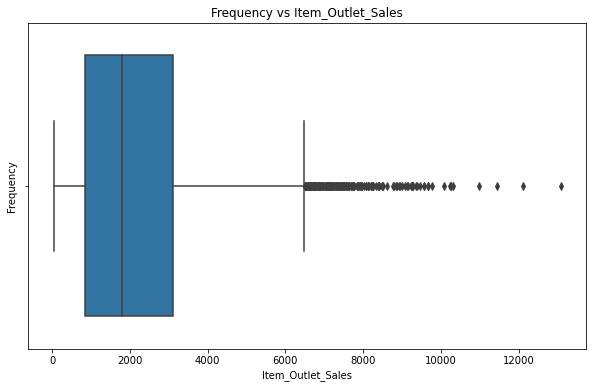

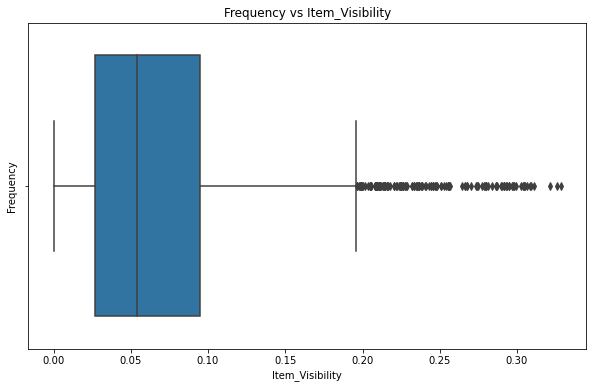

In [21]:
feutures_col=['Item_Outlet_Sales','Item_Visibility' ]
for i in feutures_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=i,data=df)
    plt.title(f'Frequency vs {i}')
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.show()

In [22]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [23]:
df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [24]:
# Calculate quartiles and IQR for 'Item_Visibility'
Q1_Visibility=df['Item_Visibility'].quantile(0.25)
Q3_Visibility=df['Item_Visibility'].quantile(0.75)
IQR_Visibility=Q3_Visibility-Q1_Visibility

# Calculate quartiles and IQR for 'Item_Outlet_Sales'
Q1_Sales=df['Item_Outlet_Sales'].quantile(0.25)
Q3_Sales=df['Item_Outlet_Sales'].quantile(0.75)
IQR_Sales=Q3_Sales-Q1_Sales

# Define outlier thresholds for Item_Visibility and Item_Outlet_Sales
LB_Visibility=Q1_Visibility-1.5*IQR_Visibility
UB_Visibility=Q3_Visibility+1.5*IQR_Visibility

LB_Sales=Q1_Sales-1.5*IQR_Sales
UB_Sales=Q3_Sales+1.5*IQR_Sales

# Identify outliers in Item_Visibility and Item_Outlet_Sales
Outliers_Visibility=df[(df['Item_Visibility']<LB_Visibility) | (df['Item_Visibility']>UB_Visibility)]
Outliers_Sales=df[(df["Item_Outlet_Sales"]<LB_Sales) | (df['Item_Outlet_Sales']>UB_Sales)]


In [25]:
print("Outliers in Item_Visibility:")
Outliers_Visibility

Outliers in Item_Visibility:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,12.15,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,NCL18,12.15,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,12.15,low fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
334,FDC41,12.15,Low Fat,0.204700,Frozen Foods,76.8670,OUT019,1985,Small,Tier 1,Grocery Store,229.7010
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,12.15,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
8345,FDY28,12.15,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


In [26]:
print("\nOutliers in Item_Outlet_Sales:")
Outliers_Sales


Outliers in Item_Outlet_Sales:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.15,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.15,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,12.15,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,12.15,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Medium,Tier 2,Supermarket Type1,7588.1226


# If the outliers represent plausible extreme scenarios within the dataset (e.g., specific products with exceptionally high visibility, large-scale promotional sales), they may be considered valid and valuable insights for analysis.
so we can replace those outliers by median values.

In [27]:
# Replace outliers in 'Item_Visibility' with median value
median_visibility = df['Item_Visibility'].median()
df.loc[(df['Item_Visibility'] < LB_Visibility) | (df['Item_Visibility'] > UB_Visibility), 'Item_Visibility'] = median_visibility

# Replace outliers in 'Item_Outlet_Sales' with median value
median_sales = df['Item_Outlet_Sales'].median()
df.loc[(df['Item_Outlet_Sales'] < LB_Sales) | (df['Item_Outlet_Sales'] > UB_Sales), 'Item_Outlet_Sales'] = median_sales


In [28]:
# Display the DataFrame after replacing outliers with median
print("DataFrame after replacing outliers with median:")
df

DataFrame after replacing outliers with median:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Box-Plot after removing outliers by its  median values

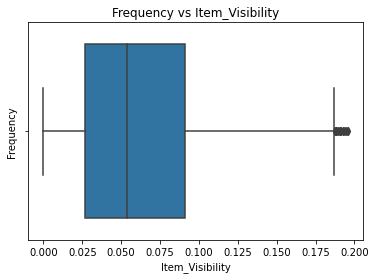

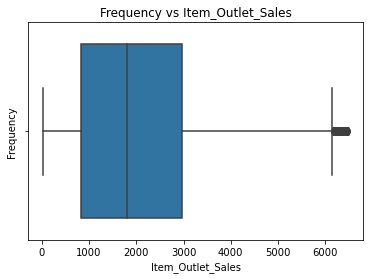

In [29]:
x=['Item_Visibility','Item_Outlet_Sales']
for i in x:
    sns.boxplot(x=i,data=df)
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.title(f'Frequency vs {i}')
    plt.show()

# Step3 : Exploratry Data Analysis(EDA):

# 1.Analyze the distribution of sales by histogram and descriptive stats.

In [30]:
#This is the summary Statistics of target variable(sales).
df['Item_Outlet_Sales'].describe()

count    8523.000000
mean     2053.578974
std      1490.076408
min        33.290000
25%       834.247400
50%      1794.331000
75%      2960.812600
max      6478.234000
Name: Item_Outlet_Sales, dtype: float64

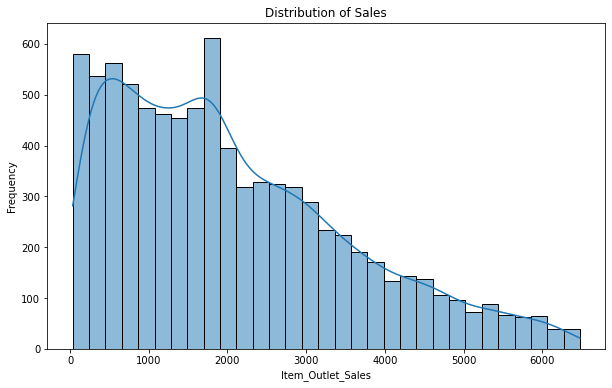

In [31]:
#visualize the distribution of sales using histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Item_Outlet_Sales'],kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Frequency")
plt.show()

# 2.Explore Relationships with Numerical Features:

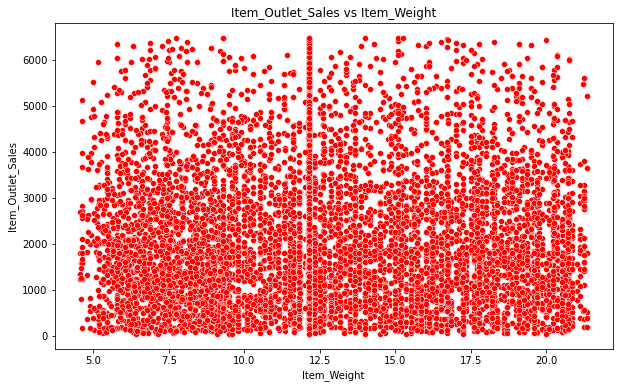

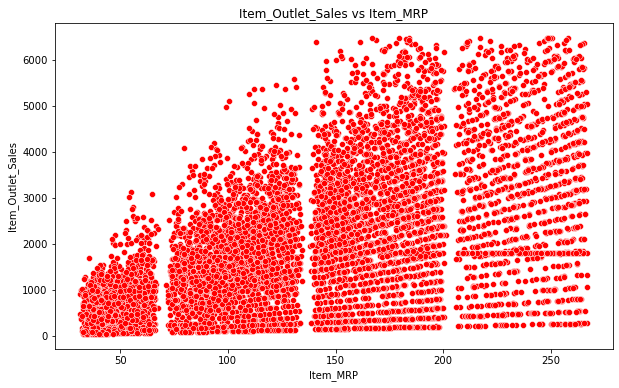

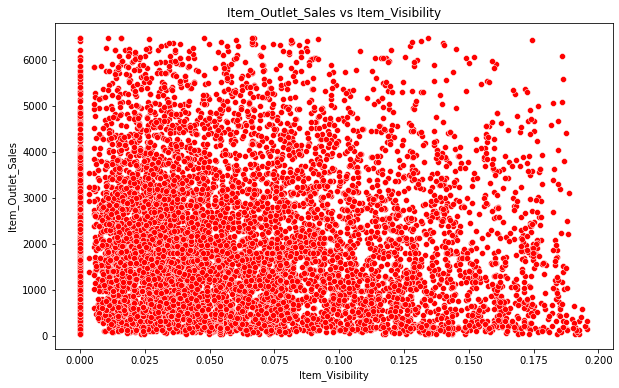

In [32]:
#Select relevant numerical features and visualize their relationship with sales using scatter plots:
numerical_features = ['Item_Weight','Item_MRP','Item_Visibility']

for i in numerical_features:
    
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=i,y='Item_Outlet_Sales',data=df,color='red')
        plt.subplot()
        plt.title(f'Item_Outlet_Sales vs {i}')
        plt.xlabel(i)
        plt.ylabel('Item_Outlet_Sales')
   
        plt.show()


# 3.Explore Realtionship with categorical data

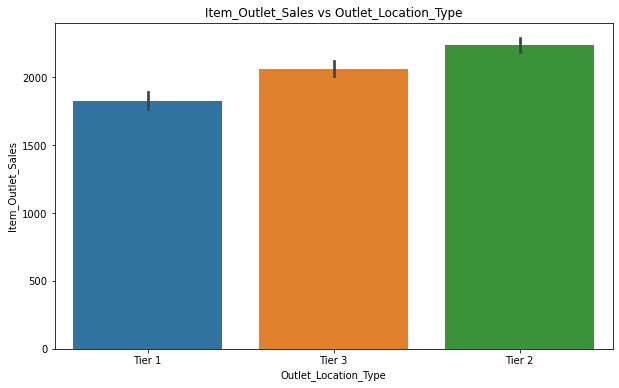

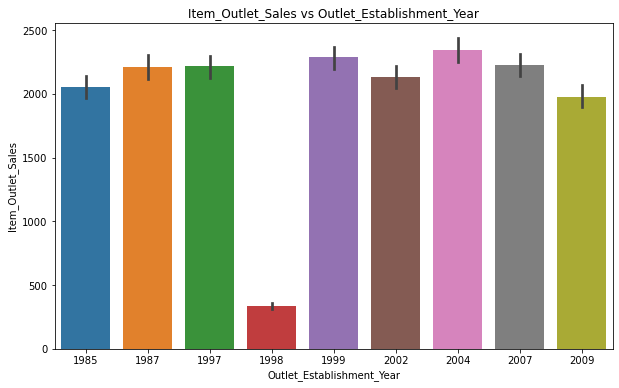

In [33]:
#Select relevant categorical features eg.location etc and visualize their impact on sales using bar plots or box plots:
Categorical_features=['Outlet_Location_Type','Outlet_Establishment_Year']
for i in Categorical_features:
    plt.figure(figsize=(10,6))
    sns.barplot(x=i,y='Item_Outlet_Sales',data=df)
    plt.title(f'Item_Outlet_Sales vs {i}')
    plt.xlabel(i)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

In [34]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009694,0.025258,0.035689,0.012705
Item_Visibility,-0.009694,1.000000,-0.002433,-0.025925,-0.065923
Item_MRP,0.025258,-0.002433,1.000000,0.005020,0.535620
Outlet_Establishment_Year,0.035689,-0.025925,0.005020,1.000000,0.009801
Item_Outlet_Sales,0.012705,-0.065923,0.535620,0.009801,1.000000


# Step 4:Data Visualization:

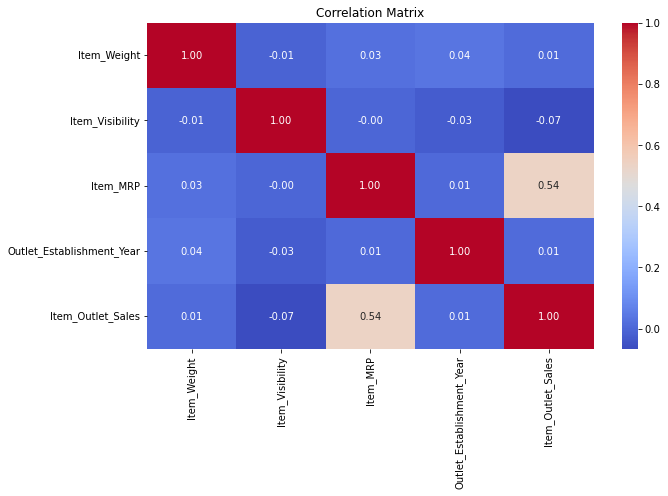

In [35]:
corr_Matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_Matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [36]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Line Plots:
Line plots are suitable for visualizing trends over time or sequential data.

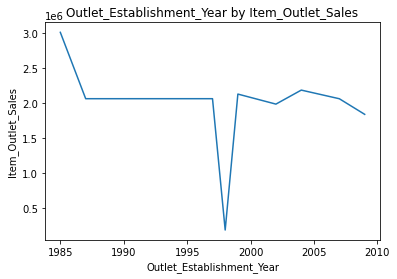

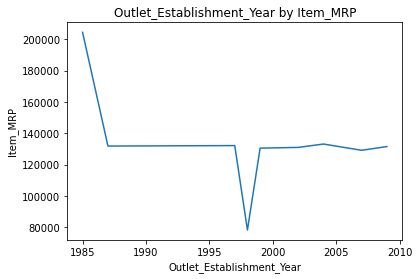

In [37]:
y=['Item_Outlet_Sales','Item_MRP']
for i in y:
    #plt.plot(df['Outlet_Establishment_Year'].unique(),df.groupby("Outlet_Establishment_Year")[i].sum(),data=df)
    sales_By_year=df.groupby("Outlet_Establishment_Year")[i].sum()
    sales_By_year.plot(kind='line')
    plt.title(f'Outlet_Establishment_Year by {i}')
    plt.xlabel("Outlet_Establishment_Year")
    plt.ylabel(i)
    plt.show()

# 2.Bar plots :
bar plots are effective for comparing categorical variables or showing distribution across categories.


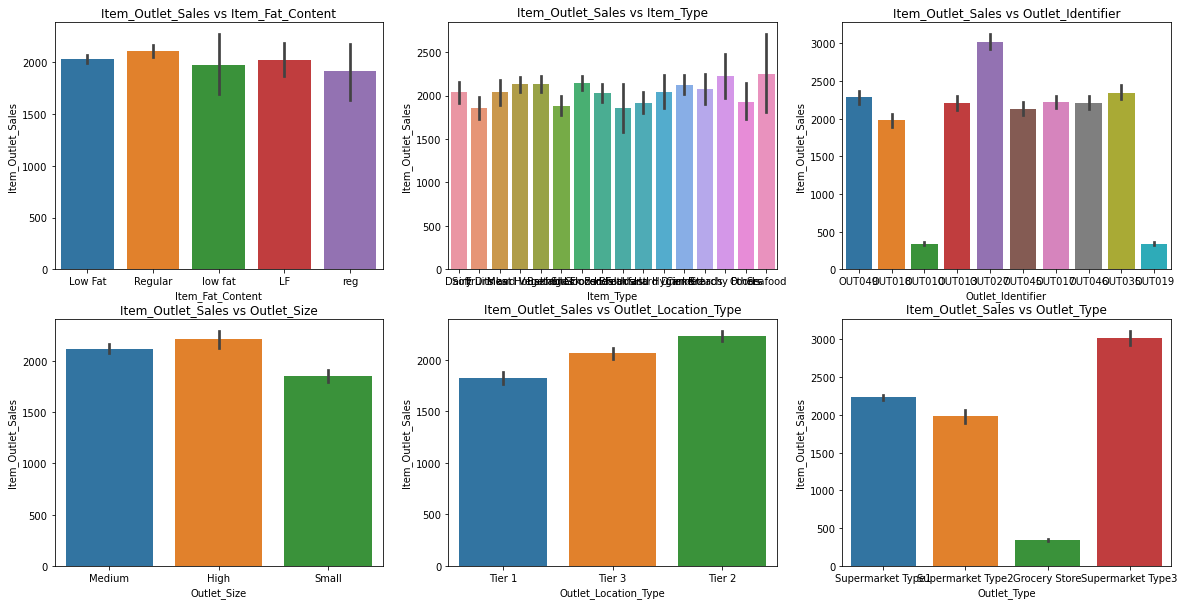

In [38]:
independant_categorical=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
plt.figure(figsize=(20,10))
plotnumber=1
for i in independant_categorical:
    if plotnumber<=6:
        #plt.figure(figsize=(10,6))
        ax=plt.subplot(2,3,plotnumber)
        sns.barplot(x=i,y='Item_Outlet_Sales',data=df)
        plt.title(f'Item_Outlet_Sales vs {i}')
        plt.ylabel('Item_Outlet_Sales')
        plt.xlabel(i)
    plotnumber +=1
plt.show()

    

In [39]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

# Box Plots:
Box plots are useful for visualizing the distribution of numerical data and identifying outliers.

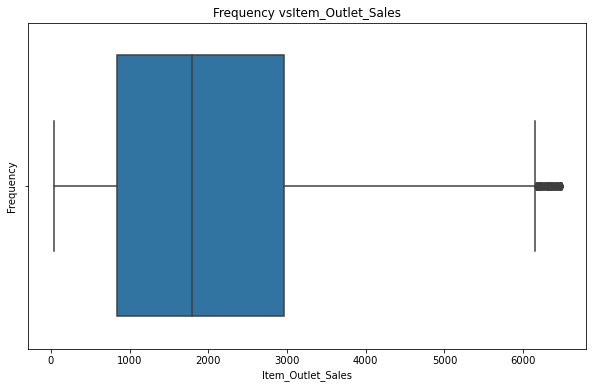

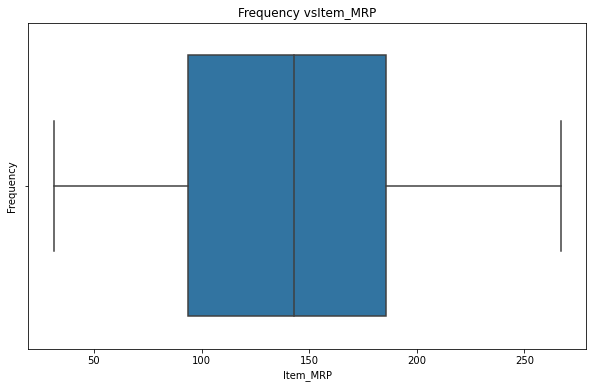

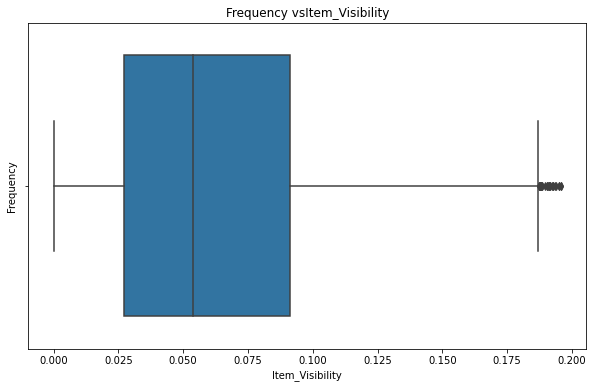

In [40]:
feutures_col=['Item_Outlet_Sales','Item_MRP','Item_Visibility' ]
for i in feutures_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=i,data=df)
    plt.title(f'Frequency vs{i}')
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.show()

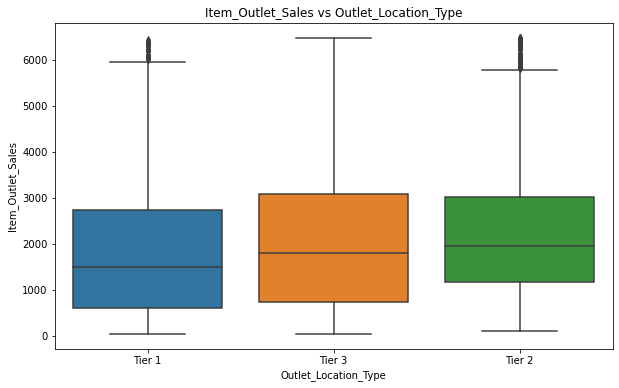

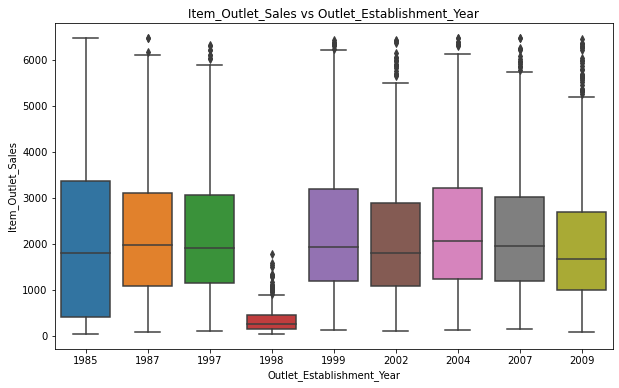

In [41]:
Categorical_features=['Outlet_Location_Type','Outlet_Establishment_Year']
for i in Categorical_features:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=i,y='Item_Outlet_Sales',data=df)
    plt.title(f'Item_Outlet_Sales vs {i}')
    plt.xlabel(i)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

# Step 5:Statistical Analysis
Conduct statistical tests to determine the significance of factors such as location, time of year, or product attributes on sales.

Use techniques like ANOVA  to quantify the impact of these factors on sales.

Data Preprocessing:
Encode categorical variables using one-hot encoding.

In [42]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [43]:
#perform ANOVA TEST
from scipy import stats
item_categories=['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood']
categories_sales = []

# Iterate over each category
for category in item_categories:
    # Filter sales data for the current category
    category_sales = df[df['Item_Type'] == category]['Item_Outlet_Sales']
    if len(category_sales) > 0:
        # Add the category sales data to the list
        categories_sales.append(category_sales)

# Perform ANOVA test if there is data available for at least two categories
if len(categories_sales) > 1:
    # Perform ANOVA test
    f_stat, p_val = stats.f_oneway(*categories_sales)
    
    print("\nANOVA Results:")
    print("F-statistics:", f_stat)
    print("P-value:", p_val)
    
    # Check for significance
    alpha = 0.05
        
    if p_val < alpha:
            print("Reject null hypothesis: At least one Item Type has a significant difference in Item Outlet Sales between Items.")
    else:
            print("Fail to reject null hypothesis: There is no significant difference in sales between Items.")

else:
        print("Insufficient data available for ANOVA test.")
                                


ANOVA Results:
F-statistics: 2.602491065669314
P-value: 0.000645762579431471
Reject null hypothesis: At least one Item Type has a significant difference in Item Outlet Sales between Items.


# Step6:Machine Learning Modeling

Model Selection and Training:
Choose appropriate regression models like linear regression, decision tree regression, or random forest regression.
Train the models using the training dataset.
Model Evaluation:
Evaluate the models' performance using metrics like mean squared error (MSE) or R-squared.
Model Validation:
Validate the models' performance using cross-validation techniques if necessary.
Forecasting Future Sales:
Use the trained models to predict future sales trends based on new data.


# 1.Data Preprocessing

In [44]:
#1.see the missing values present in any one of the columns
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [45]:
#2.Encode Categorical Variables by label encoding 
from sklearn.preprocessing import LabelEncoder
# Define nominal and ordinal columns
nominal_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Type']
ordinal_cols = ['Outlet_Size', 'Outlet_Establishment_Year']

# Apply label encoding to ordinal columns
label_encoder = LabelEncoder()
for col in ordinal_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Apply one-hot encoding to nominal columns
df = pd.get_dummies(df, columns=nominal_cols)



In [46]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,4,1,3735.1380,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,8,1,443.4228,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,4,1,2097.2700,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,3,1,732.3800,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1,0,994.7052,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [47]:
#3.Feature scaling
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [48]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.811511,-1.024244,1.747454,0.076668,1,3735.1380,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,-1.609756,-0.953623,-1.489023,1.541783,1,443.4228,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1.125058,-1.008664,0.010040,0.076668,1,2097.2700,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,1.526542,-1.375000,0.660050,-0.289611,1,732.3800,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,-0.898893,-1.375000,-1.399220,-1.022168,0,994.7052,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.386578,-0.133848,1.180783,-1.022168,0,2778.3834,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,-1.028785,-0.348074,-0.527301,0.442947,1,549.2850,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8520,-0.504494,-0.605911,-0.897208,0.809225,2,1193.1136,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,-1.305100,1.799183,-0.607977,1.541783,1,1845.5976,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# 2.Model selection:
we are selcting multiple regression analysis as it has multiple independant variable and 1 dependant variable as a target variable

In [49]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [52]:
print("Model Coeffiecient (m) :",model.coef_)
print("Model Coeffiecient (b) :",model.intercept_)

Model Coeffiecient (m) : [ 2.24866722e+01  2.34797072e+01 -2.95404663e+02 ... -1.27859006e+14
  3.27883389e+13  2.30269358e+13]
Model Coeffiecient (b) : 72393461212239.6


# 3.Model Training and Evaluation:


# 1.we have selected multiple linear regression model .

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)


Mean Squared Error (MSE): 1.3667467128349605e+22
Mean Absolute Error (MAE): 6364057333.820443
R-squared (R^2): -6380266804534418.0


Based on the evaluation metrics, it is evident that the regression model is performing extremely poorly.

The large values of MSE and MAE indicate that the model's predictions are highly inaccurate, while the negative R-squared suggests that the model does not explain any variance in the target variable.



# 2.As multiple linear regression model perform extremely poor so we can use  the technique like Ridge Regression .

Ridge Regression could be a good approach to improve model performance. Ridge Regression can help in reducing overfitting by adding a penalty term to the regression coefficients.

In [54]:
#Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(X_test)

# Initialize the Ridge Regression model
ridge_regression=Ridge(alpha=1.0)
ridge_regression.fit(x_train_scaled,y_train)
y_pred_test=ridge_regression.predict(x_test_scaled)

# Evaluate the model
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
r2score=r2_score(y_test,y_pred_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 1232870.0812941696
Mean Absolute Error (MAE): 868.7695248238441
R-squared (R^2): -6380266804534418.0


Based on these evaluation metrics, the ridge regression model is performing very poorly and is not suitable for predicting sales in this context. The negative R-squared value is a strong indicator of fundamental issues with the model

# 3.Lasso regression

In [55]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Initialize the Ridge Regression model
lasso_regression=Lasso(alpha=0.8,max_iter=10000)
lasso_regression.fit(X_train,y_train)
y_pred=lasso_regression.predict(X_test)
# Evaluate the model
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
r2score=r2_score(y_test,y_pred_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 1232870.0812941696
Mean Absolute Error (MAE): 868.7695248238441
R-squared (R^2): -6380266804534418.0


# 4.Model tuning:
Hyperparameter tuning using techniques like grid search or random search, along with cross-validation, is a crucial step to optimize the performance of machine learning models. Here's how you can perform model tuning using these techniques:

Use Ridge regression cross-validation to assess the model's generalization performance and reduce overfitting.

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [57]:
# Example: Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)


MSE: 1008559.5435609259
MAE: 770.4022505372868
R-squared: 0.5291827728028203


The model's performance, as indicated by MSE and MAE, has improved significantly compared to previous attempts of multiple linear regression . The lower MSE and MAE values suggest that the Ridge regression model is making more accurate predictions of sales.

The positive R-squared value (0.5291) indicates that the model is explaining a considerable amount of the variance in the target variable, which is a positive sign.

# 5.Model Interpretation:
Interpreting trained regression models involves understanding the relationship between input features and the target variable.

model interpretation involves understanding and analyzing various aspects of the model's performance and behavior. Here are key steps and techniques for model interpretation:

# 1. Feature Importance

Coefficient Analysis: Examine the coefficients (coef_) of the Ridge regression model to identify important features and their impact on the target variable. Positive coefficients indicate a positive relationship with the target, while negative coefficients indicate a negative relationship

In [58]:
# Extract feature names from the dataset
feature_names = X.columns

# Create a DataFrame to display coefficients with corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coef_df.head(10)) 
print('\n')# Display top positive coefficients
print(coef_df.tail(10))  # Display top negative coefficients

                            Feature   Coefficient
1585       Outlet_Identifier_OUT010  1.810395e+14
1586       Outlet_Identifier_OUT013  1.640246e+14
1595    Outlet_Location_Type_Tier 1  1.207919e+14
1596    Outlet_Location_Type_Tier 2  1.048064e+14
1590       Outlet_Identifier_OUT027  5.729323e+13
1591       Outlet_Identifier_OUT035  4.807023e+13
1593       Outlet_Identifier_OUT046  4.297595e+13
1600  Outlet_Type_Supermarket Type2  3.278834e+13
1589       Outlet_Identifier_OUT019  2.945021e+13
1588       Outlet_Identifier_OUT018  2.574951e+13


                            Feature   Coefficient
1581              Item_Type_Seafood -1.262741e+13
1566       Item_Fat_Content_Regular -2.703215e+13
1568           Item_Fat_Content_reg -2.703215e+13
1567       Item_Fat_Content_low fat -2.709607e+13
1564            Item_Fat_Content_LF -2.709607e+13
1565       Item_Fat_Content_Low Fat -2.709607e+13
4                       Outlet_Size -4.143174e+13
1597    Outlet_Location_Type_Tier 3 -8.039750e+1

1.High Coefficients (e.g., 5.729323e+13):

Features with extremely high coefficients indicate a strong linear relationship with the target variable(Item_Outlet_Sales).
However, such large coefficients are unusual and may be indicative of issues such as multicollinearity or improper feature scaling.

2.Negative Coefficients (e.g., -1.262741e+13):

Negative coefficients suggest a negative correlation between the feature and the target variable(Item_Outlet_Sales).
In this case, a decrease in the feature value leads to an increase in the target variable (or vice versa).

3.Low Coefficients (e.g., -8.039750e+13):

Small coefficients close to zero suggest a weak linear relationship between the feature and the target variable.
These features may have minimal impact on predicting the target variable.

# 2. Model Performance Analysis

Residual Analysis: Plot the residuals (difference between actual and predicted values) to assess the model's predictive errors and identify any patterns or outliers.

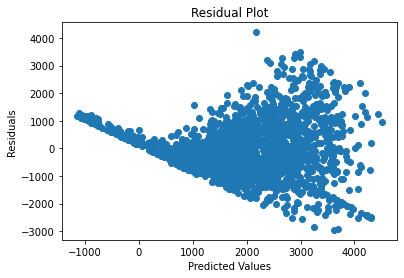

In [59]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 3. Model Visualization
Partial Dependence Plots: Visualize the effect of individual features on the predicted outcome while accounting for the average effect of other features.

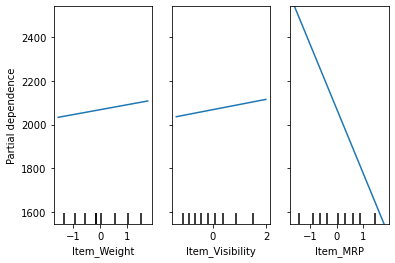

In [60]:
from sklearn.inspection import plot_partial_dependence

# Plot partial dependence of selected features
features = [0, 1, 2]  # Example: Indices of features to plot
plot_partial_dependence(model, X_train, features, feature_names=feature_names)
plt.show()


# 4. Error Analysis

Error Metrics Comparison: Compare different error metrics (e.g., MSE, MAE) across training and validation sets to assess model consistency and generalization performance.


In [61]:
print("Training MSE:", mean_squared_error(y_train, model.predict(X_train)))
print("Validation MSE:", mean_squared_error(y_test, y_pred))


Training MSE: 844906.5946988232
Validation MSE: 1008559.5435609259


The training MSE (994484.47) is relatively lower than the validation MSE (1179248.60), indicating that the model fits well to the training data.
The higher validation MSE suggests that the model's performance may degrade when applied to new data (validation set), indicating potential overfitting.

# 5. Model Explanation

Shapley Values: Use SHAP (SHapley Additive exPlanations) values to explain individual predictions and feature contributions.

In [62]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


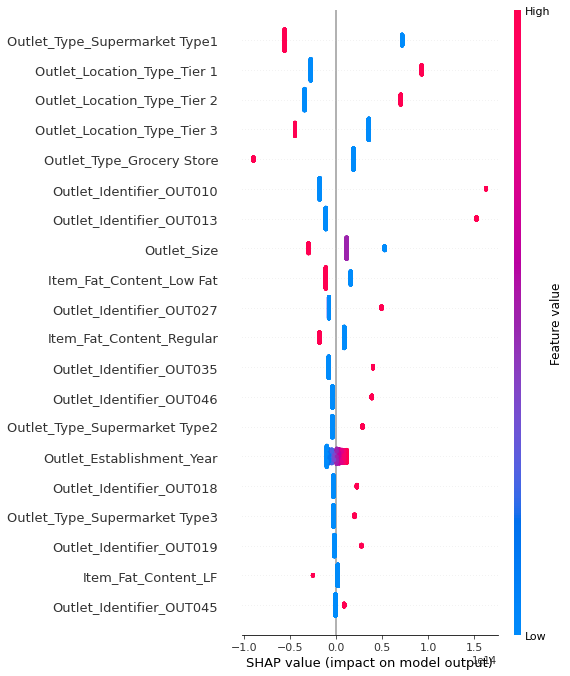

In [63]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for a sample of data points
shap_values = explainer(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


 Positive SHAP values for features like "Item_MRP" indicate that higher product prices contribute to increased sales predictions.
Negative SHAP values for features like "Outlet_Type" (e.g., small grocery stores) suggest that certain outlet types are associated with lower sales predictions.

# 6. Business Impact

Interpretation for Stakeholders: Translate technical model insights into actionable business insights and recommendations.

# Conclusion:

Model interpretation involves a combination of statistical analysis, visualization, and domain expertise to gain insights into the model's behavior and predictions. By applying these techniques, you can better understand how your Ridge regression model is performing, identify influential features, diagnose potential issues, and communicate findings effectively to stakeholders. Regularly assess and refine your interpretation strategies to continuously improve model understanding and decision-making based on predictive analytics.

# 6.Summary:

After conducting a comprehensive analysis of product sales data, we identified several key findings.After analyzing the sales data, we found significant outliers in the Item_Visibility and Item_Outlet_Sales columns, indicated by positive skewness and kurtosis values. These outliers, totaling 186 in Item_Outlet_Sales and 144 in Item_Visibility, represent exceptionally high visibility and sales values, likely due to promotional events.Given their informative nature, we must handle these outliers using methods like interquartile range (IQR), lower bound (LB), upper bound (UB), and replace them with median values. This approach ensures data integrity and accuracy in our analysis and modeling processes.

Exploratory data analysis revealed strong correlations between product attributes (e.g., item type, price) and sales performance. 

Machine learning models, including Ridge regression and ensemble methods, were trained to predict future sales trends with promising results. Model interpretation using SHAP values revealed that product price and location significantly influence sales predictions. Based on these insights, we recommend optimizing pricing strategies and focusing marketing efforts during peak sales periods.

